In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [3]:
path    = '/data/'  # If data in 'data' directory
delian = pd.read_excel(path + 'DeLiAn_edited.xlsx', sheet_name=None)
# Now delian is a dictionary where each key is the sheet name
# and each value is the corresponding DataFrame

In [ ]:
for sheet_name, df in delian.items():
    print(f"Sheet Name: {sheet_name}")
    print(df.head())

In [5]:
delian.keys()

dict_keys(['List of variables', '1', '6', '2', '7', '3', '8', '13', '9', '14', '10', '18', '11', '19', '12', '17', '4', '5', '15', '16', '20', '21'])

In [6]:
variable_names = delian['List of variables']
# Iterate through each sheet and rename them
for sheet_name in delian.keys():
    if sheet_name != 'List of variables':
        # Filter the rows based on the condition and selecting the 'Variables (unit)' column
        new_sheet_name = variable_names.loc[variable_names['Sheet'] == int(sheet_name), 'Variables (unit)'].values[0]
        delian[new_sheet_name] = delian.pop(sheet_name)

In [7]:
delian.keys()

dict_keys(['List of variables', 'angstrom_exponent_backscatter_355_532 (1)', 'error_angstrom_exponent_backscatter_355_532 (1)', 'angstrom_exponent_backscatter_532_1064 (1)', 'error_angstrom_exponent_backscatter_532_1064 (1)', 'angstrom_exponent_extinction_355_532 (1)', 'error_angstrom_exponent_extinction_355_532 (1)', 'lidar_ratio_355 (sr)', 'error_lidar_ratio_355 (sr)', 'lidar_ratio_532 (sr)', 'error_lidar_ratio_532 (sr)', 'particle_linear_depolarization_ratio_355 (%)', 'error_particle_linear_depolarization_ratio_355 (%)', 'particle_linear_depolarization_ratio_532 (%)', 'error_particle_linear_depolarization_ratio_532 (%)', 'number_samples (1)', 'campaign_rv', 'date', 'location', 'measurement_type', 'reference', 'system'])

In [8]:
samples = delian['number_samples (1)']
samples

,Ash,Saharan dust,Central Asian dust,Middle Eastern dust,Smoke,Stratospheric smoke,Dust and smoke,Pollution,Dust and pollution,Dried marine,Clean marine,Dust and marine,Central European background
0,4,30,23,4,71,8,25,42,15,7,52,21,14


### **Data Preprocessing**

In [10]:
#Define a new df containing the label (type of aerosol) of all observations
aerosol = []
for col in samples.columns:
  for i in range(int(samples[col])):
    aerosol.append(col)
aerosol = pd.DataFrame({"aerosol": aerosol})
aerosol['aerosol'] = aerosol['aerosol'].astype('category') #convert type from Object to Categorical
aerosol

,aerosol
0,Ash
1,Ash
2,Ash
3,Ash
4,Saharan dust
...,...
311,Central European background
312,Central European background
313,Central European background
314,Central European background


In [11]:
# Sheets to be interessed
quantitatives = [
    'angstrom_exponent_backscatter_355_532 (1)',
    'error_angstrom_exponent_backscatter_355_532 (1)',
    'angstrom_exponent_backscatter_532_1064 (1)',
    'error_angstrom_exponent_backscatter_532_1064 (1)',
    'angstrom_exponent_extinction_355_532 (1)',
    'error_angstrom_exponent_extinction_355_532 (1)',
    'lidar_ratio_355 (sr)',
    'error_lidar_ratio_355 (sr)',
    'lidar_ratio_532 (sr)',
    'error_lidar_ratio_532 (sr)',
    'particle_linear_depolarization_ratio_355 (%)',
    'error_particle_linear_depolarization_ratio_355 (%)',
    'particle_linear_depolarization_ratio_532 (%)',
    'error_particle_linear_depolarization_ratio_532 (%)'
]
delian = {key: delian[key] for key in quantitatives}

In [273]:
properties = [
    'angstrom_exponent_backscatter_355_532 (1)',
    'angstrom_exponent_backscatter_532_1064 (1)',
    'angstrom_exponent_extinction_355_532 (1)',
    'lidar_ratio_355 (sr)',
    'lidar_ratio_532 (sr)',
    'particle_linear_depolarization_ratio_355 (%)',
    'particle_linear_depolarization_ratio_532 (%)',
]
delian = {key: delian[key] for key in properties}

In [274]:
# Convert each sheet to a column as variable
delian_df = pd.DataFrame()

# Iterate through each sheet and extract information
for sheet_name, df in delian.items():
  new_values = []
  for col in df.columns:
    for value in df[col]:
      # Check if the value is not NaN
      if pd.notna(value):
        new_values.append(value)
  new_df = pd.DataFrame({sheet_name: new_values})
  delian_df = pd.concat([delian_df, new_df], axis=1)

delian_df = pd.concat([delian_df, aerosol], axis=1)
delian_df

,angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),aerosol
0,-9999.00,-9999.00,-9999.00,55.00,-9999.0,36.50,-9999.0,Ash
1,-9999.00,-9999.00,-9999.00,55.00,-9999.0,37.50,-9999.0,Ash
2,0.22,1.05,0.68,39.00,32.0,-9999.00,-9999.0,Ash
3,1.00,1.00,1.00,55.00,64.0,34.00,-9999.0,Ash
4,-9999.00,-9999.00,-9999.00,63.00,-9999.0,24.00,31.0,Saharan dust
...,...,...,...,...,...,...,...,...
311,-9999.00,-9999.00,-9999.00,48.07,-9999.0,2.91,-9999.0,Central European background
312,-9999.00,-9999.00,-9999.00,58.02,-9999.0,3.76,-9999.0,Central European background
313,-9999.00,-9999.00,-9999.00,58.57,-9999.0,3.75,-9999.0,Central European background
314,-9999.00,-9999.00,-9999.00,60.56,-9999.0,3.91,-9999.0,Central European background


### **Data Imputation**

In [275]:
test = delian_df.copy()

# Hàm tính trung bình không tính đến -9999
def mean_without_9999(column):
    mean = column[column != -9999.].mean()
    return mean

# Hàm thay thế giá trị -9999 bằng giá trị trung bình của các giá trị còn lại của biến
def replace_9999(column):
    mean = mean_without_9999(column)
    column[column == -9999.] = mean
    return column

# Áp dụng hàm replace_9999 cho mỗi biến của mỗi loại aerosol trong DataFrame
df = test.groupby('aerosol').transform(replace_9999)

df

,angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%)
0,0.610000,1.025000,0.840000,55.00,48.00000,36.50,NaN
1,0.610000,1.025000,0.840000,55.00,48.00000,37.50,NaN
2,0.220000,1.050000,0.680000,39.00,32.00000,36.00,NaN
3,1.000000,1.000000,1.000000,55.00,64.00000,34.00,NaN
4,0.028737,0.459035,0.100489,63.00,53.06897,24.00,31.000
...,...,...,...,...,...,...,...
311,1.444033,1.234233,1.492750,48.07,56.19020,2.91,3.165
312,1.444033,1.234233,1.492750,58.02,56.19020,3.76,3.165
313,1.444033,1.234233,1.492750,58.57,56.19020,3.75,3.165
314,1.444033,1.234233,1.492750,60.56,56.19020,3.91,3.165


In [276]:
df.duplicated().sum()

0

In [279]:
df.describe().T.style.background_gradient(cmap='BuPu')

,count,mean,std,min,25%,50%,75%,max
angstrom_exponent_backscatter_355_532 (1),316.000000,0.779530,0.617844,-0.500000,0.272608,0.814661,1.365803,2.489430
angstrom_exponent_backscatter_532_1064 (1),316.000000,0.799295,0.430504,-0.241943,0.491313,0.864506,1.166186,2.148480
angstrom_exponent_extinction_355_532 (1),316.000000,0.943316,0.692282,-0.428108,0.356404,0.932919,1.492750,2.706950
lidar_ratio_355 (sr),316.000000,50.673770,19.096687,12.821490,39.963554,51.113568,60.439445,118.548560
lidar_ratio_532 (sr),316.000000,49.166890,20.697239,12.063000,32.055051,48.000000,68.000000,112.000000
particle_linear_depolarization_ratio_355 (%),316.000000,9.528075,9.782796,0.222900,1.417881,3.572565,19.060428,37.500000
particle_linear_depolarization_ratio_532 (%),312.000000,10.883079,11.012441,0.306700,2.787500,3.165000,18.897338,35.886610


In [300]:
from sklearn.impute import SimpleImputer

# Create an imputer object to fill NaNs with the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer and transform the scaled data to fill in NaNs
df_imputed = imputer.fit_transform(df)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

### **Principal Componants Analysis** *làm xong thấy vô dụng vl, bỏ qua đi*

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(df.keys()):
    sns.histplot(data=df[column], bins = 30, kde=True, ax=axes[i])  # Create histogram plot
    axes[i].set_title(f'{column}')  # Set title for the plot
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(None)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# violin plot
axs[0].violinplot(df, showmeans=False, showmedians=True)
axs[0].set_title('Violin plot')

# box plot
axs[1].boxplot(df)
axs[1].set_title('Box plot')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
ss = StandardScaler()

# Fit and transform the data
df_scaled = ss.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=quantitatives)

# Now you can access the data types of the columns
df_scaled.dtypes

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# violin plot
axs[0].violinplot(df_scaled, showmeans=False, showmedians=True)
axs[0].set_title('Violin plot - Scaled variables')

# box plot
axs[1].boxplot(df_scaled)
axs[1].set_title('Box plot - Scaled variables')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,9))

# correlation between columns
sns.heatmap(df_scaled.corr(), annot=True, fmt='.1f')
plt.xticks(rotation=40)

plt.show()

In [52]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_imputed)


In [ ]:
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 14
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

plt.tight_layout()
plt.show()

In [ ]:
box = plt.boxplot(df_pca, patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of principal components")
plt.tight_layout()
plt.show()

### **Data Preprocessing 2**

In [283]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Mã hóa cột label
aerosol_encoder = label_encoder.fit_transform(aerosol.values.flatten())

aerosol_encoder

array([ 3,  3,  3,  3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  2,  2,  2,  2, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  5,  5,  5,  5

Chia tập dữ liệu một cách có kiểm soát để đảm bảo tỷ lệ giữa tập huấn luyện và tập kiểm tra là nhất quán cho mỗi lớp.

In [320]:
from sklearn.model_selection import train_test_split

# Phân chia tập dữ liệu với stratified sampling
X_train, X_test, y_train, y_test = train_test_split(df_imputed, aerosol_encoder, test_size=0.7, stratify=aerosol_encoder, random_state=42)

In [321]:
ss.fit(X_train)
X_train = ss.transform(X_train)
# Giữ nguyên tham số chuẩn hóa cho bộ test
X_test = ss.transform(X_test)

### **K-Nearest Neighbors**

In [335]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

param_grid=[{"n_neighbors":list(range(1,15))}]

# cv=3 nghĩa là phương pháp kiểm định chéo 3 lớp được sử dụng để đánh giá mỗi cấu hình tham số.
# n_jobs=-1 nghĩa là sử dụng tất cả các lõi CPU có sẵn để tăng tốc quá trình tìm kiếm.
stratified_k_fold = StratifiedKFold(n_splits=3) # Sử dụng số lượng splits phù hợp với dữ liệu
knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=stratified_k_fold,n_jobs=-1, verbose =2)

#knnOpt sẽ là phiên bản tối ưu của kNN sau khi tìm kiếm.
knnOpt=knn.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (knnOpt.best_score_,knnOpt.best_params_))

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best score = 0.860759, Best parameter = {'n_neighbors': 1}


In [336]:
# Dự đoán trên tập kiểm tra
y_pred = knnOpt.predict(X_test)

In [337]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8860759493670886
[[12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  8  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 10  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  1  0  0  0  0  2  0 32  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.96      0.94        26
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       0.86      0.86      0.86         7
           5       1.00      0.67      0.80         3
           6       0.89      0.73      0.80  

### **Support Vector Machine (SVM)**

In [338]:
from sklearn.svm import SVC

param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
svm= GridSearchCV(SVC(),param,cv=stratified_k_fold,n_jobs=-1, verbose=2)
svmOpt=svm.fit(X_train, y_train)
print("Best score = %f, Best parameter = %s" % (svmOpt.best_score_,svmOpt.best_params_))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best score = 0.810127, Best parameter = {'C': 1.4}


In [339]:
y_pred = svmOpt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.879746835443038
[[12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  5  0]
 [ 0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  8  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 11  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0 33  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      1.00      0.96        26
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         7
           5       1.00      0.67      0.80         3
           6       0.89      0.73      0.80   

### **Decision Tree**

In [340]:
from sklearn.tree import DecisionTreeClassifier

param=[{"max_depth": [1, 2, 4, 8, 16, 32, 64, None]}]

dtc = DecisionTreeClassifier(random_state=42)

tree= GridSearchCV(dtc,param,cv=stratified_k_fold,n_jobs=-1, verbose =2)
treeOpt=tree.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (treeOpt.best_score_,treeOpt.best_params_))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best score = 0.734177, Best parameter = {'max_depth': 8}


In [341]:
y_pred = treeOpt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8607594936708861
[[12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 11  0  2  0  0]
 [ 0  3  0  0  0  0  0  0  0 18  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  2  0  0  0  0  1  0 32  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.89      0.92      0.91        26
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       0.75      0.86      0.80         7
           5       1.00      0.67      0.80         3
           6       0.60      0.55      0.57  

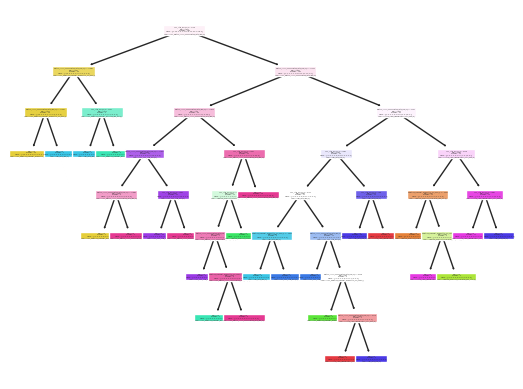

In [342]:
from sklearn.tree import plot_tree
plot_tree(treeOpt.best_estimator_, filled = True, feature_names=df_imputed.columns.tolist(), class_names=quantitatives);
plt.show() # đ thấy cc gì và cũng ko biết chỉnh sao

### **Random Forest**

In [343]:
from sklearn.ensemble import RandomForestClassifier

param=[{'n_estimators': [50, 100, 500],
        'max_features': [2, 3, 4],
        'max_depth' : [2, 4, 8, None]}]

rf= GridSearchCV(RandomForestClassifier(random_state=42),param,cv=stratified_k_fold,n_jobs=-1, verbose = 2)

rfOpt=rf.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (rfOpt.best_score_,rfOpt.best_params_))

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best score = 0.892405, Best parameter = {'max_depth': 8, 'max_features': 2, 'n_estimators': 50}


In [344]:
y_pred = rfOpt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9367088607594937
[[12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      1.00      0.96        26
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.86      0.92         7
           5       1.00      0.67      0.80         3
           6       0.83      0.91      0.87  

In [345]:
rf= rfOpt.best_estimator_

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(properties[indices[f]], importances[indices[f]])

particle_linear_depolarization_ratio_532 (%) 0.2139616310459157
lidar_ratio_532 (sr) 0.1731340861184179
particle_linear_depolarization_ratio_355 (%) 0.15732116492625503
lidar_ratio_355 (sr) 0.14681512657625012
angstrom_exponent_backscatter_355_532 (1) 0.12361585803048321
angstrom_exponent_extinction_355_532 (1) 0.09998735288817596
angstrom_exponent_backscatter_532_1064 (1) 0.08516478041450211


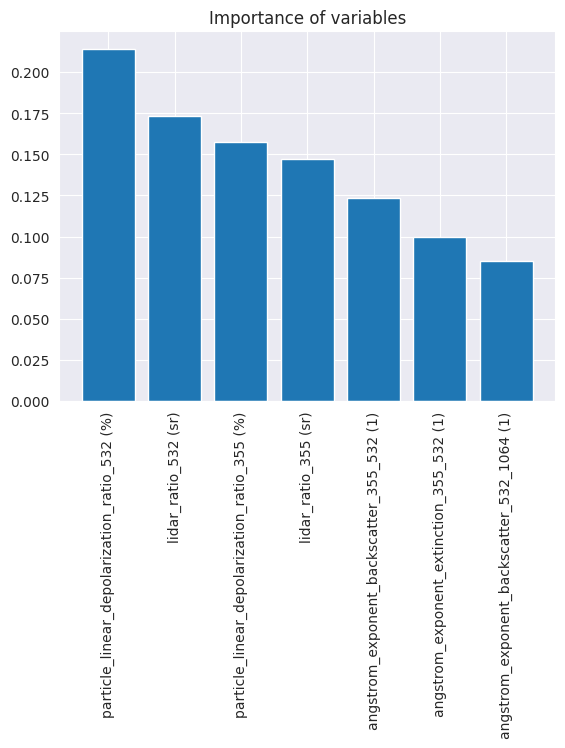

In [346]:
sorted_properties = [properties[indices[f]] for f in range(X_train.shape[1])]


plt.figure()
plt.title("Importance of variables")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), sorted_properties, rotation=90);
plt.show()

In [352]:
# Keeping NaN values
X_train, X_test, y_train, y_test = train_test_split(df, aerosol_encoder, test_size=0.3, stratify=aerosol_encoder, random_state=42)

In [353]:
ss.fit(X_train)
X_train = ss.transform(X_train)
# Giữ nguyên tham số chuẩn hóa cho bộ test
X_test = ss.transform(X_test)

### **Hist Gradient Boosting**

In [354]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()

hgb.fit(X_train, y_train)

y_pred = hgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9368421052631579
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.94      0.97        16
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.75      0.86         4
           5       0.67      1.00      0.80         2
           6       0.83      0.83      0.83  

### **Extreme Gradient Boosting (XGBoost)**

In [355]:
import xgboost as xgb
from xgboost import XGBClassifier

param = [{
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 4, 8, None]
}]

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgbs = GridSearchCV(xgb_model, param, cv=stratified_k_fold, n_jobs=-1, verbose=2)

xgbOpt = xgbs.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (xgbOpt.best_score_,xgbOpt.best_params_))

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best score = 0.896110, Best parameter = {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}


In [356]:
y_pred = xgbOpt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9157894736842105
[[ 6  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0 15  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  4  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.94      0.94      0.94        16
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           6       0.80      0.67      0.73  